# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [91]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [92]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
       

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | north bend
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | yeed
Processing Record 5 of Set 1 | nemuro
Processing Record 6 of Set 1 | petropavlovsk-kamchatsky
Processing Record 7 of Set 1 | al kharijah
Processing Record 8 of Set 1 | pamandzi
Processing Record 9 of Set 1 | weno
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | new richmond
Processing Record 12 of Set 1 | baiti
Processing Record 13 of Set 1 | inongo
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | aktau
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | laojunmiao
Processing Record 21 of Set 1 | cho dok
Processing Record 22 of Set 1 | chonchi
Processing Record 23 of S

Processing Record 36 of Set 4 | port glaud
City not found. Skipping...
Processing Record 37 of Set 4 | pupiales
Processing Record 38 of Set 4 | verdal
Processing Record 39 of Set 4 | barra do corda
Processing Record 40 of Set 4 | bodo
Processing Record 41 of Set 4 | sinop
Processing Record 42 of Set 4 | klyuchi
Processing Record 43 of Set 4 | vallenar
Processing Record 44 of Set 4 | itatiaia
Processing Record 45 of Set 4 | chabahar
Processing Record 46 of Set 4 | cestos city
Processing Record 47 of Set 4 | xining
Processing Record 48 of Set 4 | saudarkrokur
Processing Record 49 of Set 4 | vernon
Processing Record 0 of Set 5 | axim
Processing Record 1 of Set 5 | enewetak
Processing Record 2 of Set 5 | ambodifotatra
Processing Record 3 of Set 5 | saipan
Processing Record 4 of Set 5 | vila franca do campo
Processing Record 5 of Set 5 | arawa
Processing Record 6 of Set 5 | al qubbah
Processing Record 7 of Set 5 | tulum
Processing Record 8 of Set 5 | buala
Processing Record 9 of Set 5 | kou

Processing Record 27 of Set 8 | el granada
Processing Record 28 of Set 8 | flin flon
Processing Record 29 of Set 8 | cova figueira
Processing Record 30 of Set 8 | kazerun
Processing Record 31 of Set 8 | ahau
City not found. Skipping...
Processing Record 32 of Set 8 | queenstown
Processing Record 33 of Set 8 | sibay
Processing Record 34 of Set 8 | pemangkat
Processing Record 35 of Set 8 | freeport
Processing Record 36 of Set 8 | bereeda
Processing Record 37 of Set 8 | vadso
Processing Record 38 of Set 8 | tucuma
Processing Record 39 of Set 8 | pizarro
Processing Record 40 of Set 8 | dinajpur
Processing Record 41 of Set 8 | port hedland
Processing Record 42 of Set 8 | san pedro pochutla
Processing Record 43 of Set 8 | la passe
Processing Record 44 of Set 8 | shihezi
Processing Record 45 of Set 8 | bonthe
Processing Record 46 of Set 8 | viedma
Processing Record 47 of Set 8 | ballina
Processing Record 48 of Set 8 | fortuna
Processing Record 49 of Set 8 | si bun rueang
Processing Record 0 o

Processing Record 17 of Set 12 | aljezur
Processing Record 18 of Set 12 | pariaman
Processing Record 19 of Set 12 | taoudenni
Processing Record 20 of Set 12 | south lake tahoe
Processing Record 21 of Set 12 | al jawf
Processing Record 22 of Set 12 | mejit
Processing Record 23 of Set 12 | hirara
Processing Record 24 of Set 12 | wad medani
Processing Record 25 of Set 12 | kenai
Processing Record 26 of Set 12 | callaway
Processing Record 27 of Set 12 | tomohon
Processing Record 28 of Set 12 | tevriz
Processing Record 29 of Set 12 | ixtapa
Processing Record 30 of Set 12 | eirunepe
Processing Record 31 of Set 12 | acarau
Processing Record 32 of Set 12 | malango
Processing Record 33 of Set 12 | bay roberts
Processing Record 34 of Set 12 | viqueque
Processing Record 35 of Set 12 | saint-joseph
Processing Record 36 of Set 12 | korotchaevo
City not found. Skipping...
Processing Record 37 of Set 12 | bengkulu
Processing Record 38 of Set 12 | mogocha
Processing Record 39 of Set 12 | malpica
Proce

In [93]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [94]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,north bend,43.4065,-124.2243,15.69,82,100,7.20,US,1685228715
1,albany,42.6001,-73.9662,24.89,39,0,0.39,US,1685228456
2,margaret river,-33.9500,115.0667,14.88,71,52,2.06,AU,1685228721
3,yeed,4.5500,43.0333,24.77,56,83,6.00,SO,1685228722
4,nemuro,43.3236,145.5750,10.87,87,100,6.26,JP,1685228722


In [95]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [96]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,north bend,43.4065,-124.2243,15.69,82,100,7.20,US,1685228715
1,albany,42.6001,-73.9662,24.89,39,0,0.39,US,1685228456
2,margaret river,-33.9500,115.0667,14.88,71,52,2.06,AU,1685228721
3,yeed,4.5500,43.0333,24.77,56,83,6.00,SO,1685228722
4,nemuro,43.3236,145.5750,10.87,87,100,6.26,JP,1685228722


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

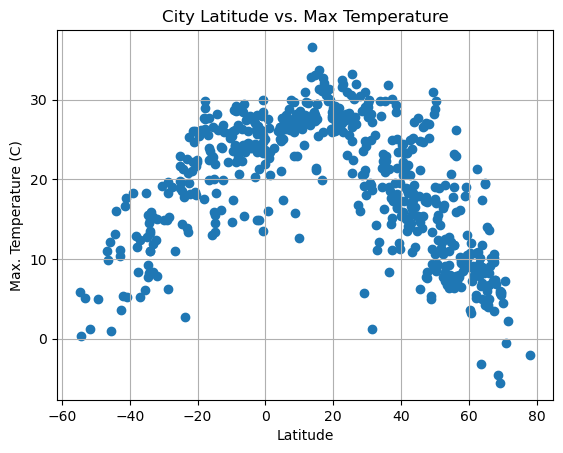

In [97]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

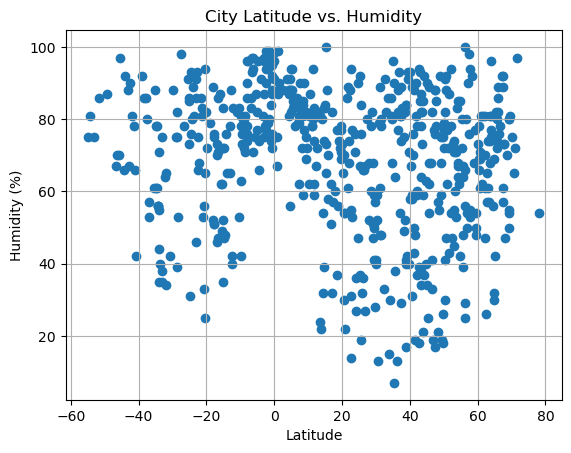

In [98]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

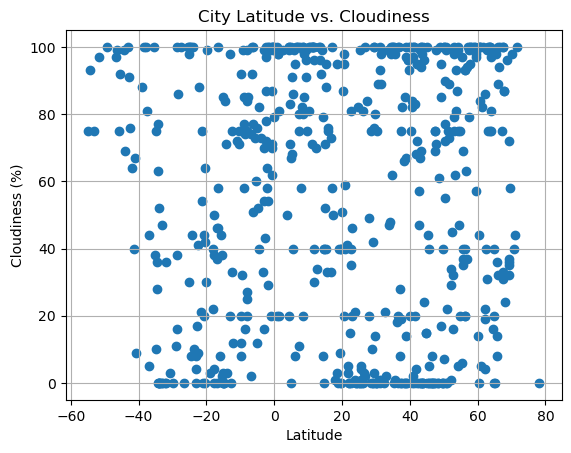

In [99]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

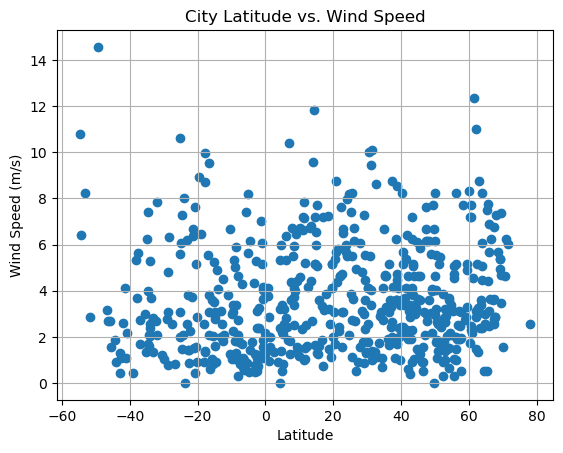

In [100]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [101]:
# Define a function to create Linear Regression plots
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

In [102]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = pd.DataFrame(northern_hemisphere)

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,north bend,43.4065,-124.2243,15.69,82,100,7.20,US,1685228715
1,albany,42.6001,-73.9662,24.89,39,0,0.39,US,1685228456
3,yeed,4.5500,43.0333,24.77,56,83,6.00,SO,1685228722
4,nemuro,43.3236,145.5750,10.87,87,100,6.26,JP,1685228722
5,petropavlovsk-kamchatsky,53.0452,158.6483,8.33,71,75,1.00,RU,1685228722


In [103]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = pd.DataFrame(southern_hemisphere)

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,margaret river,-33.9500,115.0667,14.88,71,52,2.06,AU,1685228721
7,pamandzi,-12.7967,45.2794,23.88,88,0,2.57,YT,1685228506
12,inongo,-1.9500,18.2667,21.31,98,100,2.38,CD,1685228723
13,port mathurin,-19.6833,63.4167,25.42,72,99,8.93,MU,1685228723
14,hermanus,-34.4187,19.2345,8.22,56,63,1.61,ZA,1685228723


###  Temperature vs. Latitude Linear Regression Plot

The p-value is: 6.160520874009573e-78
The r-value is: -0.7700521116987669


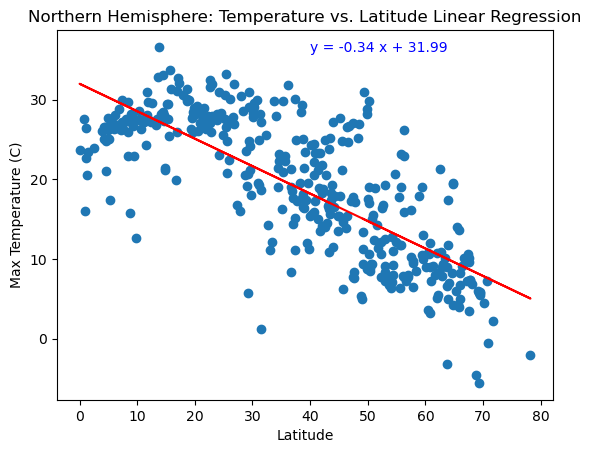

In [104]:
# Linear regression on Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)=linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"])
regress_values=northern_hemisphere_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq,(40,36), fontsize=10, color='blue')

plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='red')

plt.title("Northern Hemisphere: Temperature vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig5.png")

plt.show()

The p-value is: 3.069361858323153e-37
The r-value is: 0.7771517272721433


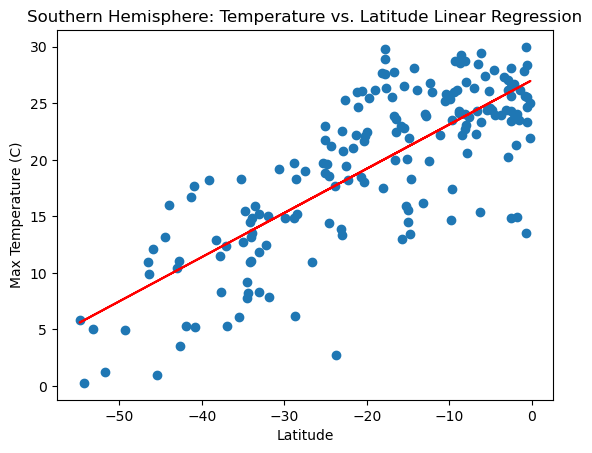

In [105]:
# Linear regression on Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)=linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"])
regress_values=southern_hemisphere_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq,(-30,280), fontsize=10, color='red')

plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='red')

plt.title("Southern Hemisphere: Temperature vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig6.png")                    

plt.show()

**Discussion about the linear relationship:** The linear regression is a representation of what happens to the temperature as the latitude increases. As you move further away from the equator in the Northern Hemisphere, the latitude increases. In the Southern Hemisphere however, the latitude decreases as you move further away from the equator. There is a negative correlation between latitude and the maximum temperature in the Northern Hemisphere, and a positive correlation in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The p-value is: 0.021591532121846106
The r-value is: -0.11616674666143718


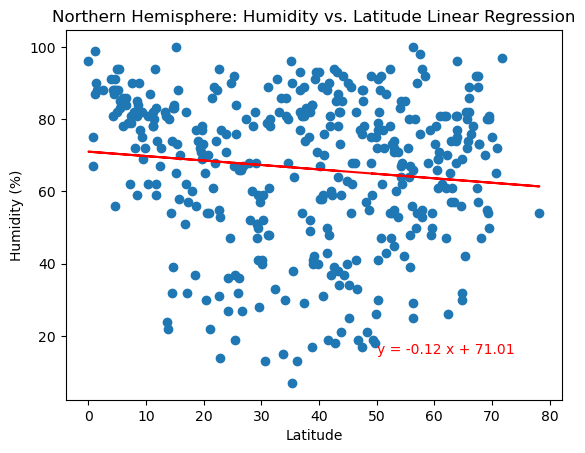

In [106]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)=linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"])
regress_values=northern_hemisphere_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq,(50,15), fontsize=10, color='red')

plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='red')

plt.title("Northern Hemisphere: Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig7.png")

plt.show()

The p-value is: 0.0003125977011877736
The r-value is: 0.2671337996523733


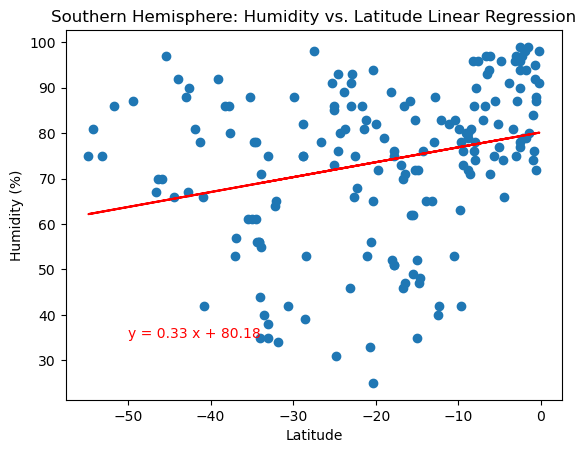

In [107]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"])
regress_values = southern_hemisphere_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.annotate(line_eq,(-50,35), fontsize=10, color='red')

plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='red')

plt.title("Southern Hemisphere: Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig8.png")

plt.show()

**Discussion about the linear relationship:** As the latitude increases in the Northern Hemisphere, so does the humidity, which is a positive correlation. In the Southern Hemisphere however, the linear regression shows no significant correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The p-value is: 0.5126911132489779
The r-value is: -0.033204409834547914


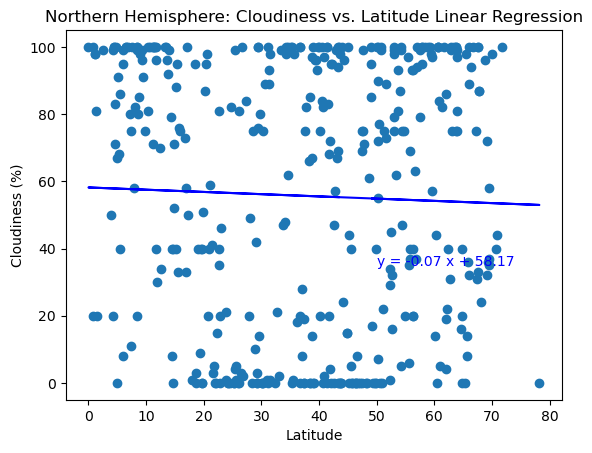

In [108]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"])
regress_values = northern_hemisphere_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.annotate(line_eq,(50,35), fontsize=10, color='blue')

plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='blue')

plt.title("Northern Hemisphere: Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig9.png")

plt.show()

The p-value is: 0.5407330119720393
The r-value is: 0.04614992169937294


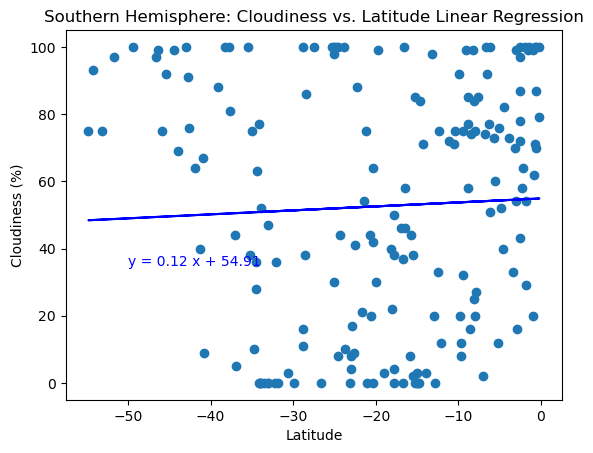

In [109]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"])
regress_values = southern_hemisphere_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.annotate(line_eq,(-50,35), fontsize=10, color='blue')

plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='blue')

plt.title("Southern Hemisphere: Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig10.png")

plt.show()

**Discussion about the linear relationship:** The correlation between cloudiness and latitude in both the Northern and Southern Hemisphere are insignificant. The Northern Hemisphere shows a slightly more positive correlation as the latitude and cloudiness increases.

### Wind Speed vs. Latitude Linear Regression Plot

The p-value is: 0.8437424133804766
The r-value is: 0.009999986567903758


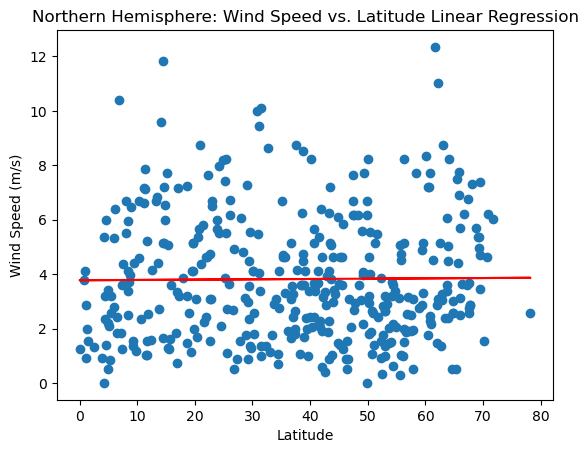

In [110]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])
regress_values = northern_hemisphere_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.annotate(line_eq,(20,15), fontsize=10, color='red')

plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='red')

plt.title("Northern Hemisphere: Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig11.png")

plt.show()

The p-value is: 0.020160107516079686
The r-value is: -0.17403780820769785


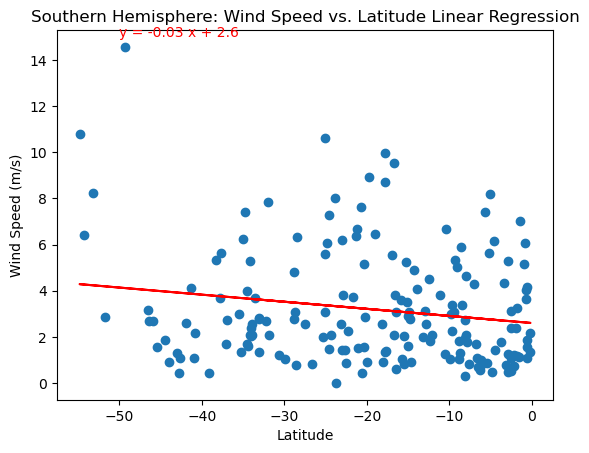

In [111]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"])
regress_values = southern_hemisphere_df["Lat"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.annotate(line_eq,(-50,15), fontsize=10, color='red')

plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='red')

plt.title("Southern Hemisphere: Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig12.png")

plt.show()

**Discussion about the linear relationship:** The correlation between latitude and wind speed is insignificant. The p-value shows that there is a slightly stronger increase in latitude and wind speed in the Northern Hemisphere.